PRUEBA # 1

# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [6]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv('../datasets/data_arma.csv',index_col=0)

# Correlaciones
# Correlaciones parciales
# Tipo de modelo
# De que orden

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
ts1    500 non-null float64
ts2    500 non-null float64
ts3    500 non-null float64
ts4    500 non-null float64
dtypes: float64(4)
memory usage: 19.5 KB


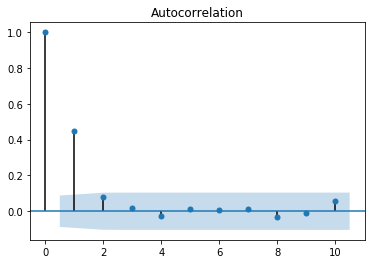

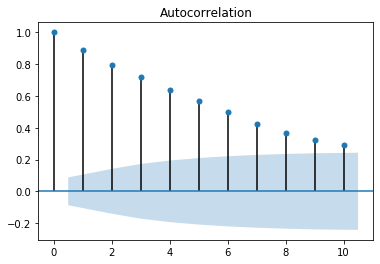

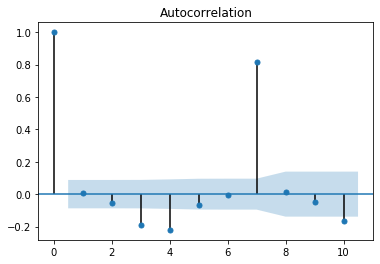

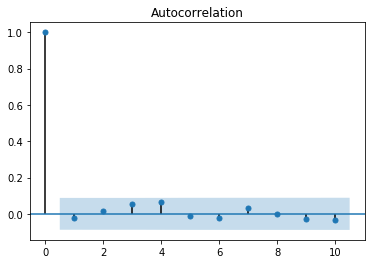

In [19]:
# Graficas de Correlaciones
plot_acf(data.ts1, lags=10); # Modelo AR
plot_acf(data.ts2, lags=10); # Modelo AR
plot_acf(data.ts3, lags=10); # Modelo MA
plot_acf(data.ts4, lags=10); # Modelo MA

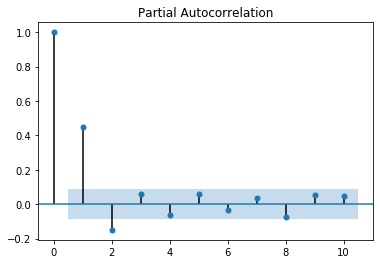

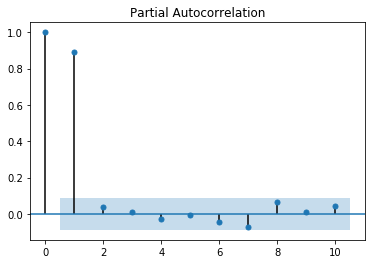

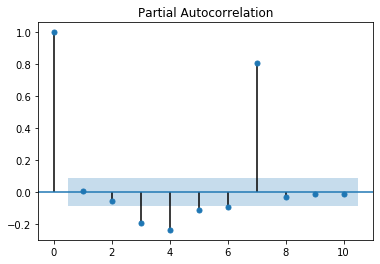

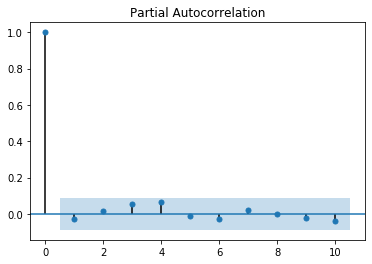

In [20]:
# Correlaciones parciales
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.ts1, lags=10)
plot_pacf(data.ts2, lags=10)
plot_pacf(data.ts3, lags=10)
plot_pacf(data.ts4, lags=10);

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast
